# Weather Practise

In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings 
warnings.filterwarnings('ignore')
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing,ExponentialSmoothing

In [2]:
# pip install statsmodels

**Task 1**

**Uploading the data**

In [3]:
wet_df = pd.read_csv('DS3_C1_S2_Weather_Data_Practice.csv')

In [4]:
wet_df

,Date,Temp
0,1981-01-01,20.7
1,1981-01-02,17.9
2,1981-01-03,18.8
3,1981-01-04,14.6
4,1981-01-05,15.8
...,...,...
3645,1990-12-27,14.0
3646,1990-12-28,13.6
3647,1990-12-29,13.5
3648,1990-12-30,15.7


In [5]:
wet_df.isnull().sum()

Date    0
Temp    0
dtype: int64

In [6]:
wet_df.duplicated().sum()

0

In [7]:
wet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3650 entries, 0 to 3649
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    3650 non-null   object 
 1   Temp    3650 non-null   float64
dtypes: float64(1), object(1)
memory usage: 57.2+ KB


In [8]:
wet_df['Date']= pd.to_datetime(wet_df['Date'])

In [9]:
wet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3650 entries, 0 to 3649
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    3650 non-null   datetime64[ns]
 1   Temp    3650 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 57.2 KB


In [10]:
wetrdf = wet_df.copy()

In [11]:
wet_df = wet_df.set_index('Date')

In [12]:
wet_df

,Temp
Date,
1981-01-01,20.7
1981-01-02,17.9
1981-01-03,18.8
1981-01-04,14.6
1981-01-05,15.8
...,...
1990-12-27,14.0
1990-12-28,13.6
1990-12-29,13.5


In [13]:
moving_average=wet_df["Temp"].rolling(window=30).mean()
moving_average

Date
1981-01-01          NaN
1981-01-02          NaN
1981-01-03          NaN
1981-01-04          NaN
1981-01-05          NaN
                ...    
1990-12-27    14.390000
1990-12-28    14.353333
1990-12-29    14.313333
1990-12-30    14.413333
1990-12-31    14.403333
Name: Temp, Length: 3650, dtype: float64

In [14]:
new_df=pd.DataFrame({'observed':wet_df['Temp'],"new_temp":moving_average})

In [15]:
new_df

,observed,new_temp
Date,,
1981-01-01,20.7,NaN
1981-01-02,17.9,NaN
1981-01-03,18.8,NaN
1981-01-04,14.6,NaN
1981-01-05,15.8,NaN
...,...,...
1990-12-27,14.0,14.390000
1990-12-28,13.6,14.353333
1990-12-29,13.5,14.313333


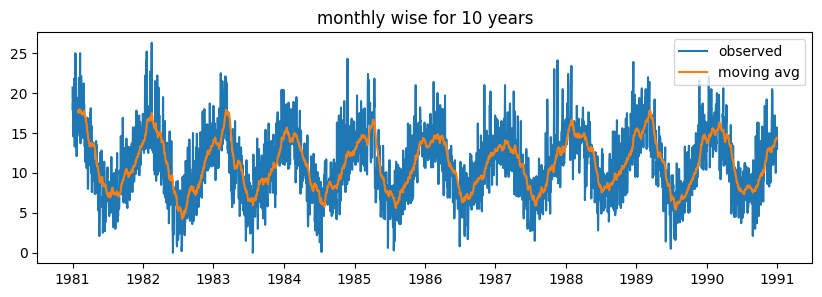

In [16]:
plt.figure(figsize=(10,3))
plt.plot(new_df,label=['observed','moving avg'])
plt.title('monthly wise for 10 years')
plt.legend()
plt.show()

In [17]:
wet_df

,Temp
Date,
1981-01-01,20.7
1981-01-02,17.9
1981-01-03,18.8
1981-01-04,14.6
1981-01-05,15.8
...,...
1990-12-27,14.0
1990-12-28,13.6
1990-12-29,13.5


**Task2**

In [18]:
decomposition = seasonal_decompose(wet_df["Temp"],period=365) 
#yearly 365
#monthly 12 over 10 yrs

In [19]:
trend =decomposition.trend
seasonal=decomposition.seasonal
residual=decomposition.resid

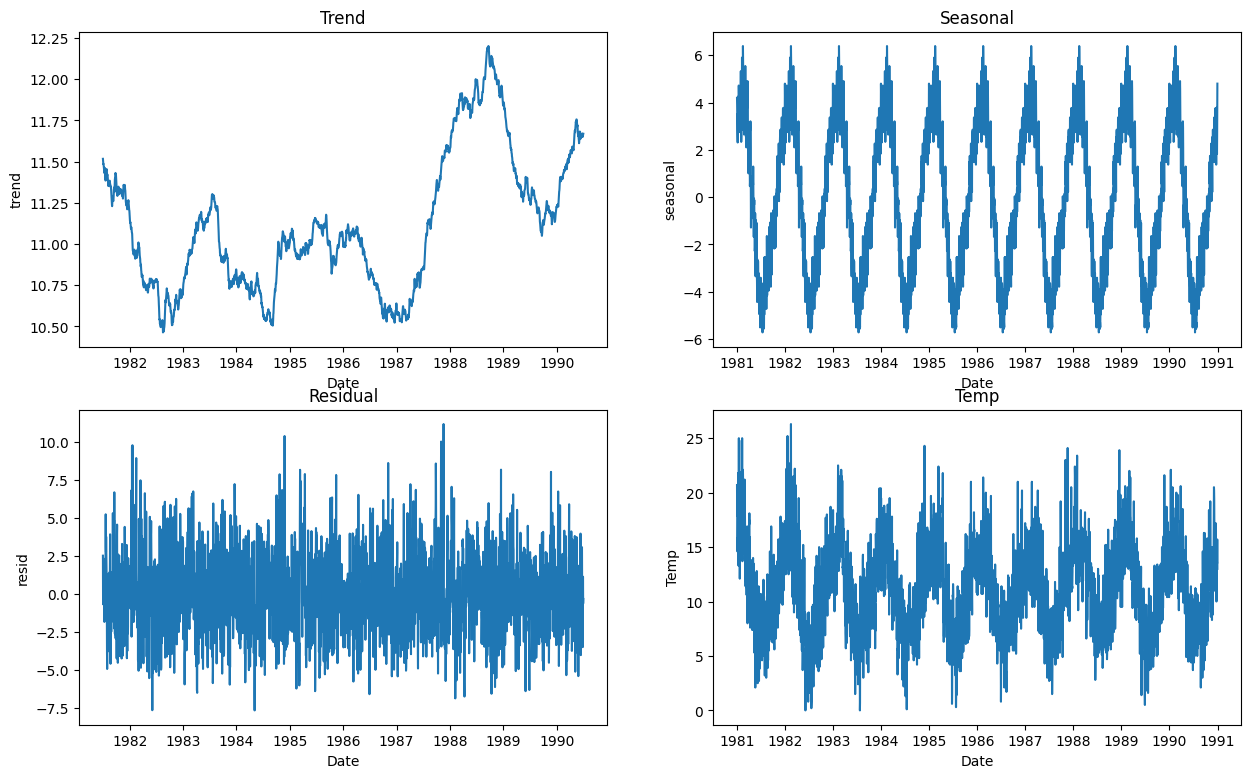

In [20]:
fig, ax = plt.subplots(2, 2, figsize=(15, 9))
ax = ax.ravel()

titles = ['Trend', 'Seasonal', 'Residual', 'Temp']

for i, j, title in zip([trend, seasonal, residual, wet_df['Temp']], range(4), titles):
    sns.lineplot(x=wet_df.index, y=i, ax=ax[j])
    ax[j].set_title(title)

plt.show()

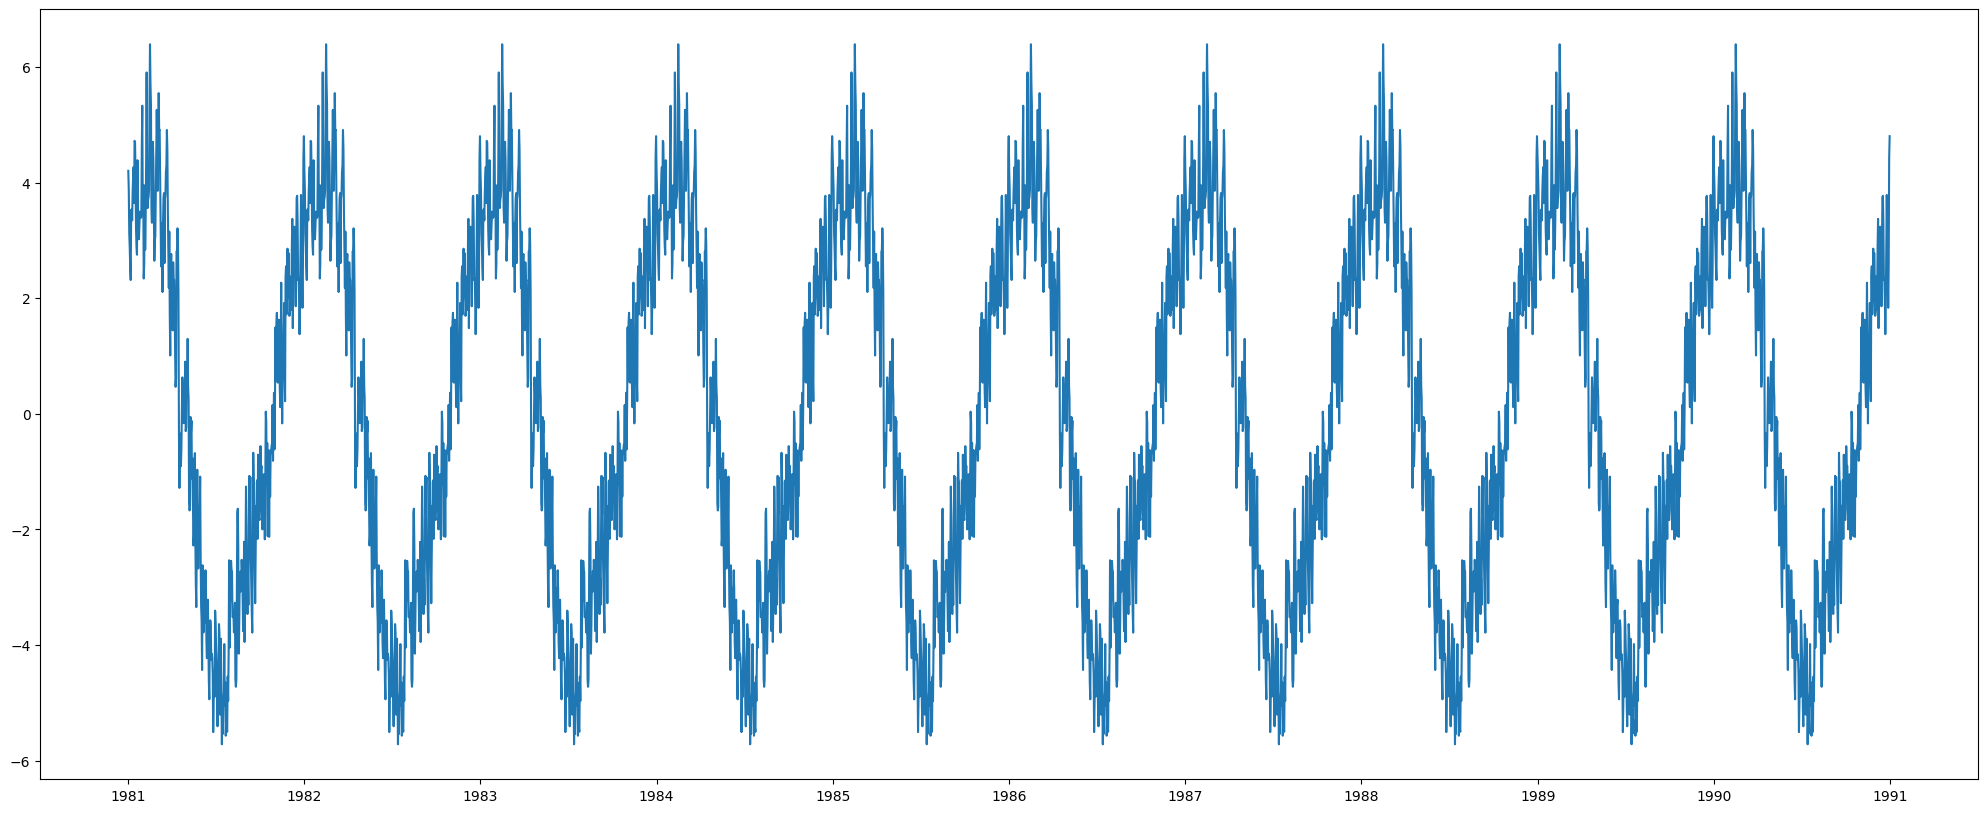

In [21]:
plt.figure(figsize=(25,10))
plt.plot(seasonal)

**Task3**

In [22]:
from statsmodels.tsa.stattools import adfuller

In [23]:
adf_result = adfuller(wet_df['Temp'])

In [24]:
adf_stat = adf_result[0]
adf_pvalue=adf_result[1]
adf_critical=adf_result[4]

In [25]:
adf_pvalue

0.0002470826300361109

In [26]:
# pvalue < 0.05 
# stationary

**Task4**

In [27]:
alpha=[0.1,0.3,0.5,0.7,0.9]

C:\Users\AARATI MAURYA\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\AARATI MAURYA\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\AARATI MAURYA\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\AARATI MAURYA\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. f

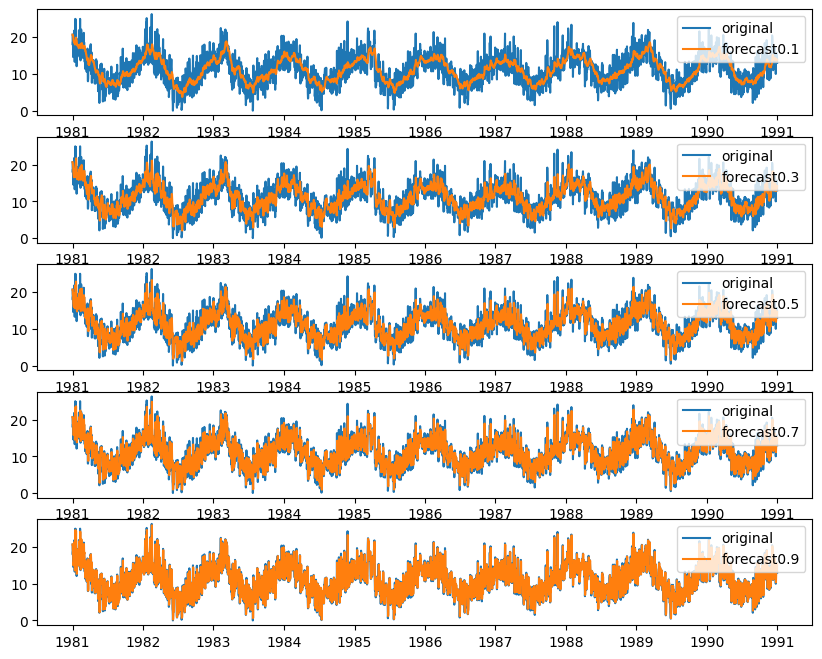

In [28]:

fig,ax=plt.subplots(len(alpha),figsize=(10,8))
for i,ap in enumerate (alpha):
    model1=SimpleExpSmoothing(wet_df["Temp"])
    fitted_model1=model1.fit(smoothing_level=ap,optimized=False)
    forecast=fitted_model1.fittedvalues
    
    ax[i].plot(wet_df["Temp"],label="original")
    ax[i].plot(forecast,label="forecast{}".format(ap))
    ax[i].legend() 
    
plt.show()

In [29]:
alpha=[0.1,0.9]
beta=[0.1,0.9]

C:\Users\AARATI MAURYA\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\AARATI MAURYA\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\AARATI MAURYA\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\AARATI MAURYA\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. f

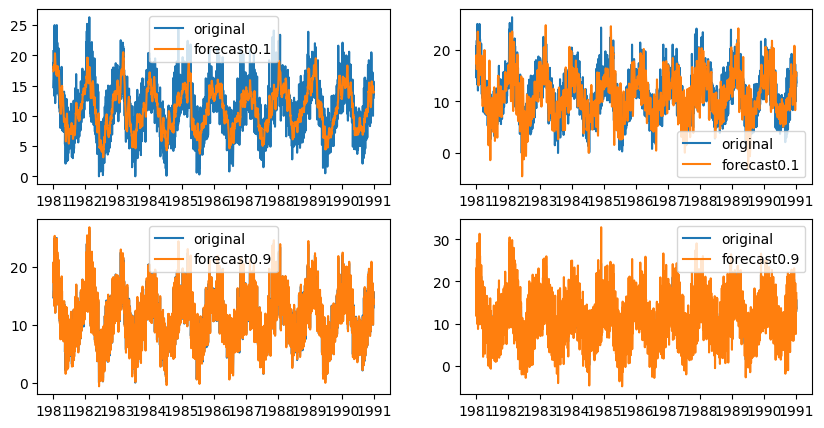

In [30]:
fig,ax=plt.subplots(len(alpha),len(beta),figsize=(10,5))
for i,ap in enumerate (alpha):
    for j,b in enumerate (beta):
        model2=ExponentialSmoothing(wet_df["Temp"],trend="add")
        fitted_model2=model2.fit(smoothing_level=ap,smoothing_trend=b,  optimized=False)
        forecast=fitted_model2.fittedvalues

        ax[i,j].plot(wet_df["Temp"],label="original")
        ax[i,j].plot(forecast,label="forecast{}".format(ap))
        ax[i,j].legend()
        
plt.show()   

C:\Users\AARATI MAURYA\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\AARATI MAURYA\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\AARATI MAURYA\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\AARATI MAURYA\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. f

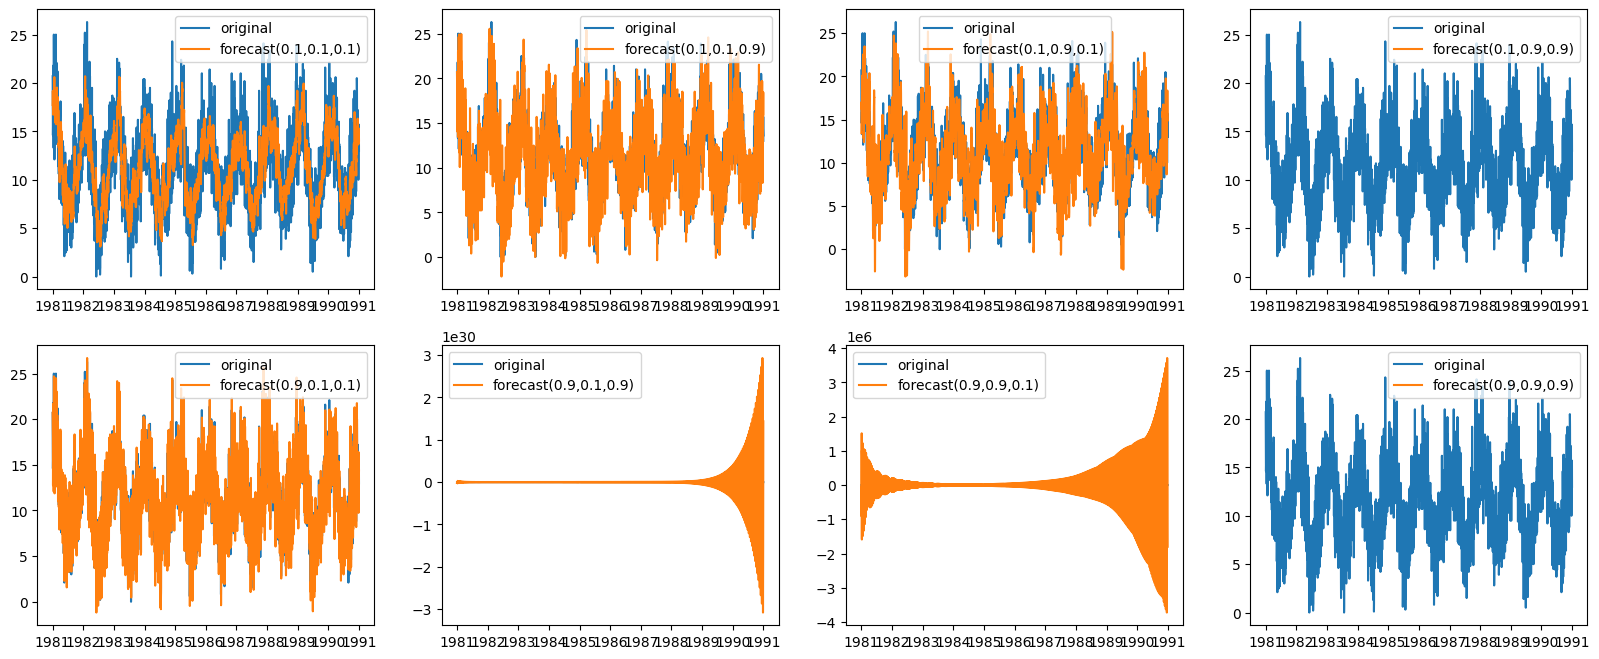

In [33]:
alpha=[0.1,0.9]
beta=[0.1,0.9]
gamma=[0.1,0.9]

fig,ax=plt.subplots(2,4,figsize=(20,8))
for i,ap in enumerate (alpha):
    for j,b in enumerate (beta):
        for k,g in enumerate (gamma):
            model3=ExponentialSmoothing(wet_df["Temp"],trend="add",seasonal="add",seasonal_periods=12)
            fitted_model3=model3.fit(smoothing_level=ap,smoothing_trend=b,smoothing_seasonal=g)
            forecast=fitted_model3.fittedvalues

            ax[i,j*len(gamma)+k].plot(wet_df["Temp"],label="original")
            ax[i,j*len(gamma)+k].plot(forecast,label="forecast({},{},{})".format(ap,b,g))
            ax[i,j*len(gamma)+k].legend()
        
plt.show()   

**Mean sum error**

In [44]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [45]:
wetrdf

,Date,Temp
0,1981-01-01,20.7
1,1981-01-02,17.9
2,1981-01-03,18.8
3,1981-01-04,14.6
4,1981-01-05,15.8
...,...,...
3645,1990-12-27,14.0
3646,1990-12-28,13.6
3647,1990-12-29,13.5
3648,1990-12-30,15.7


In [49]:
train,test=train_test_split(wet_df,test_size=0.3,random_state=42)

In [50]:
alpha=[0.1,0.3,0.5,0.7,0.9]

In [51]:
for i,ap in enumerate (alpha):
    model=SimpleExpSmoothing(wet_df["Temp"])
    fitted_model=model.fit(smoothing_level=ap,optimized=False)
    forecast=fitted_model.forecast(len(test))

In [52]:
r=mean_squared_error(test,forecast,squared=False)

In [53]:
r

4.618614202700407